## Clustering students with Agglomerative Clustering

In [71]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv("C:\Dataset\exams.csv")
data2= pd.read_csv("C:\Dataset\exams.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [72]:
#get number of data
data.shape

(1000, 8)

In [73]:
#drop the 6th,7th,8th columns
data = data.drop(['math score','reading score','writing score'], axis=1)
#change column name race/ethnicity to race
data.rename(columns = {'race/ethnicity':'race'}, inplace = True)
data.rename(columns = {'parental level of education':'parenteducation'}, inplace = True)
data.rename(columns = {'test preparation course':'testpreparation'}, inplace = True)
data = data

data.head(10)


,gender,race,parenteducation,lunch,testpreparation
0,male,group A,high school,standard,completed
1,female,group D,some high school,free/reduced,none
2,male,group E,some college,free/reduced,none
3,male,group B,high school,standard,none
4,male,group E,associate's degree,standard,completed
5,female,group D,high school,standard,none
6,female,group A,bachelor's degree,standard,none
7,male,group E,some college,standard,completed
8,male,group D,high school,standard,none
9,male,group C,some college,free/reduced,none


In [74]:
changegender = {'female':0,'male':1}
changerace = {'group A':0,'group B':0.25,'group C':0.5,'group D':0.75,'group E':1}
changeedu = {'some high school': 0, 'high school': 0.2, 'some college': 0.4, 'associate\'s degree': 0.6, 'bachelor\'s degree': 0.8, 'master\'s degree': 1}
changelunch = {'free/reduced': 0, 'standard': 1}
changetest = {'none': 0, 'completed': 1}
data.gender = [changegender[item] for item in data.gender]
data.race = [changerace[item] for item in data.race]
data.parenteducation = [changeedu[item] for item in data.parenteducation]
data.lunch = [changelunch[item] for item in data.lunch]
data.testpreparation = [changetest[item] for item in data.testpreparation]


data.head(20)



,gender,race,parenteducation,lunch,testpreparation
0,1,0.00,0.2,1,1
1,0,0.75,0.0,0,0
2,1,1.00,0.4,0,0
3,1,0.25,0.2,1,0
4,1,1.00,0.6,1,1
5,0,0.75,0.2,1,0
6,0,0.00,0.8,1,0
7,1,1.00,0.4,1,1
8,1,0.75,0.2,1,0
9,1,0.50,0.4,0,0


In [75]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
aggclustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
aggclustering.fit_predict(data)
print(aggclustering.labels_)
data['cluster'] = aggclustering.labels_
data.head(20)

[3 2 2 0 3 0 0 3 0 2 3 1 3 3 3 2 0 1 2 2 0 0 3 2 2 2 0 0 1 2 0 2 3 1 1 0 1
 2 1 0 2 0 3 0 0 0 2 1 0 3 0 2 0 2 2 1 1 3 2 0 2 0 3 3 3 1 0 2 0 0 1 0 0 1
 2 0 0 2 0 0 0 2 2 3 2 0 2 0 0 0 2 0 0 3 2 1 1 2 0 0 3 3 0 0 0 0 0 0 0 2 1
 0 0 2 0 3 2 3 2 1 1 1 1 1 0 0 0 0 3 1 1 3 0 0 0 2 3 1 2 2 2 2 0 0 3 2 1 0
 1 2 1 2 0 0 2 0 2 2 2 2 1 2 0 1 3 1 0 1 0 0 0 0 1 3 3 2 0 2 1 3 0 0 0 0 1
 0 0 2 0 3 3 0 2 1 0 2 0 2 1 0 1 0 0 1 2 3 1 0 0 0 1 0 3 0 1 2 0 2 3 0 0 3
 0 0 0 0 3 2 0 3 0 0 2 0 0 3 0 0 0 3 0 3 0 0 0 0 1 0 3 2 2 0 0 0 2 0 0 0 2
 1 0 0 0 0 3 0 0 0 0 0 0 0 3 0 1 0 2 0 0 3 0 3 1 2 2 0 0 0 2 3 0 1 3 2 1 0
 2 2 0 0 2 2 2 0 0 0 0 0 0 3 3 0 2 3 0 1 1 0 2 0 3 1 0 3 0 0 3 0 3 3 0 1 0
 0 0 3 2 2 0 1 0 2 2 0 3 2 0 0 1 1 2 0 1 3 0 0 1 0 3 3 2 2 1 3 0 0 2 0 2 0
 3 1 1 3 0 2 0 2 1 0 0 1 1 3 1 2 2 3 3 2 0 2 2 2 0 0 0 1 3 1 3 3 1 1 0 0 0
 1 0 0 0 2 2 3 0 0 2 0 0 2 0 0 2 0 0 0 2 0 2 3 0 0 2 1 0 0 0 0 0 2 1 1 3 0
 3 0 2 0 2 0 1 0 1 2 3 0 3 0 3 3 3 3 1 2 2 3 1 1 0 0 0 0 0 0 0 3 2 2 3 2 0
 2 2 2 3 0 2 0 0 0 0 1 0 

,gender,race,parenteducation,lunch,testpreparation,cluster
0,1,0.00,0.2,1,1,3
1,0,0.75,0.0,0,0,2
2,1,1.00,0.4,0,0,2
3,1,0.25,0.2,1,0,0
4,1,1.00,0.6,1,1,3
5,0,0.75,0.2,1,0,0
6,0,0.00,0.8,1,0,0
7,1,1.00,0.4,1,1,3
8,1,0.75,0.2,1,0,0
9,1,0.50,0.4,0,0,2


In [76]:
data.to_csv('hasil_cluster_aggl.csv',index=False)

In [77]:
data2['cluster'] = aggclustering.labels_
data2 = data2.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)
data2.rename(columns = {'math score':'math'}, inplace = True)
data2.rename(columns = {'reading score':'reading'}, inplace = True)
data2.rename(columns = {'writing score':'writing'}, inplace = True)
data2 = data2

print("size: ",data2.shape)
data2.head(10)

size:  (1000, 4)


,math,reading,writing,cluster
0,67,67,63,3
1,40,59,55,2
2,59,60,50,2
3,77,78,68,0
4,78,73,68,3
5,63,77,76,0
6,62,59,63,0
7,93,88,84,3
8,63,56,65,0
9,47,42,45,2


In [78]:
#get the average of data2
data2.groupby('cluster').mean()

,math,reading,writing
cluster,,,
0,69.163934,69.590164,67.822014
1,65.893750,75.943750,77.856250
2,56.798319,60.785714,57.827731
3,73.154286,72.394286,71.760000


#### Cluster 0 has the highest average score, followed closely by cluster 1, cluster 2 has the lowest average score with significant difference

<AxesSubplot:xlabel='cluster'>

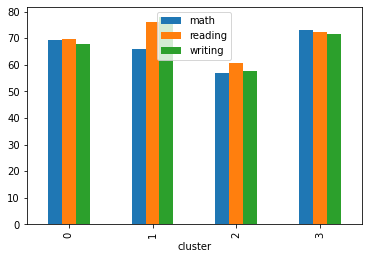

In [79]:
#get the average of math,reading, writing
data2.groupby('cluster').mean().plot.bar()
